## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [2]:
telecom_customer = pd.read_csv("/content/TelcoCustomerChurn.csv",index_col=0)

## **Exploratory Data Analysis**

**City Wise Customers**

In [3]:
def perc(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


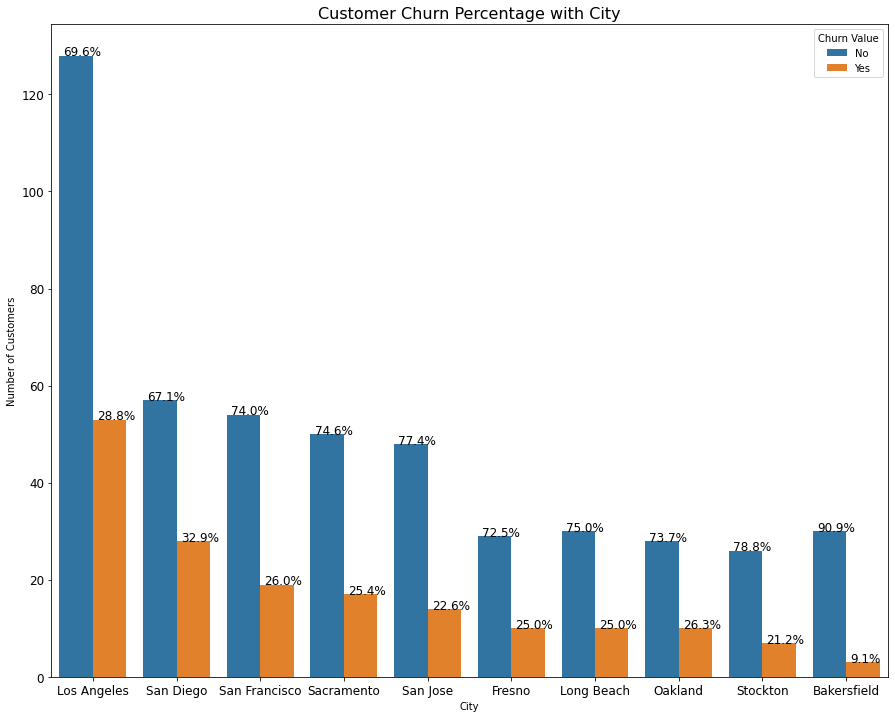

In [4]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='City',data=telecom_customer,order=telecom_customer['City'].value_counts().head(10).index,hue='Churn Value')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Customer Churn Percentage with City", size=16)
perc(ax,telecom_customer.City,10,2)


* San Diego has highest percentage of customer churn.
* Los Angeles has second highest percentage of customer churn.

**No of Customers with their Churn Reason**

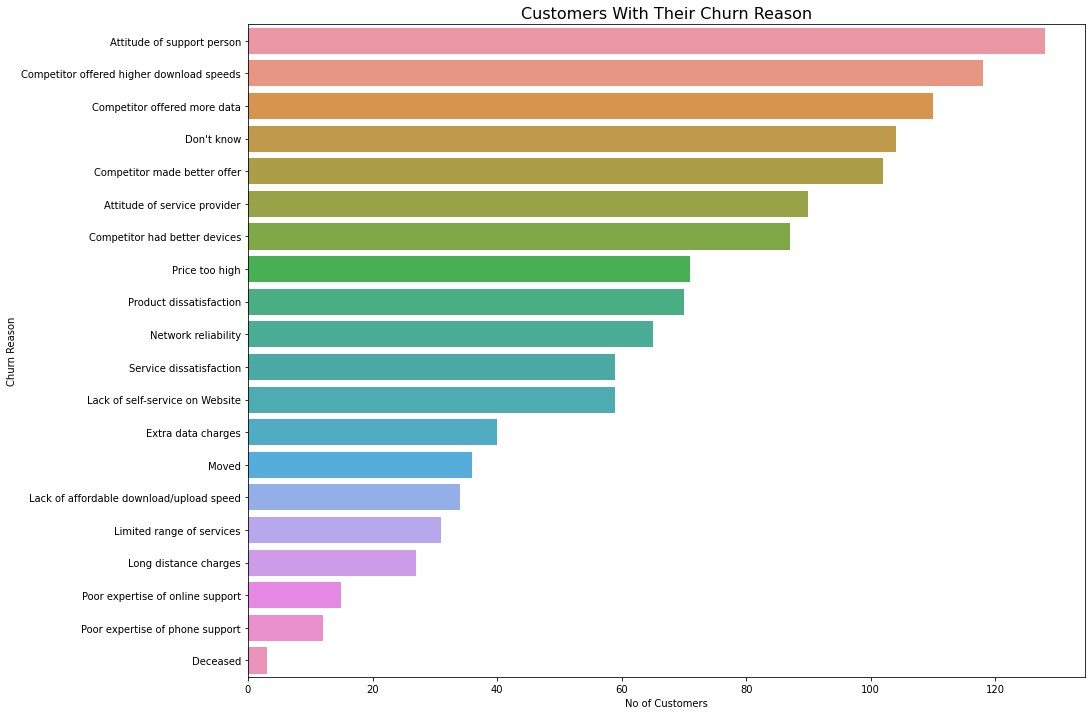

In [5]:
plt.figure(figsize=(15,12))
ax = sns.countplot(y='Churn Reason',data=telecom_customer,order=telecom_customer['Churn Reason'].value_counts().index)
plt.title("Customers With Their Churn Reason", size=16)
plt.xlabel('No of Customers')
plt.show()

Top reasons of churn:
* Attitude of support person
* Competitor offers higher download speeds

But Still there is large no of people who don't know their reason for churn

**Top 5 cities with their churn reason whose customers use Fiber Optic internet service?**

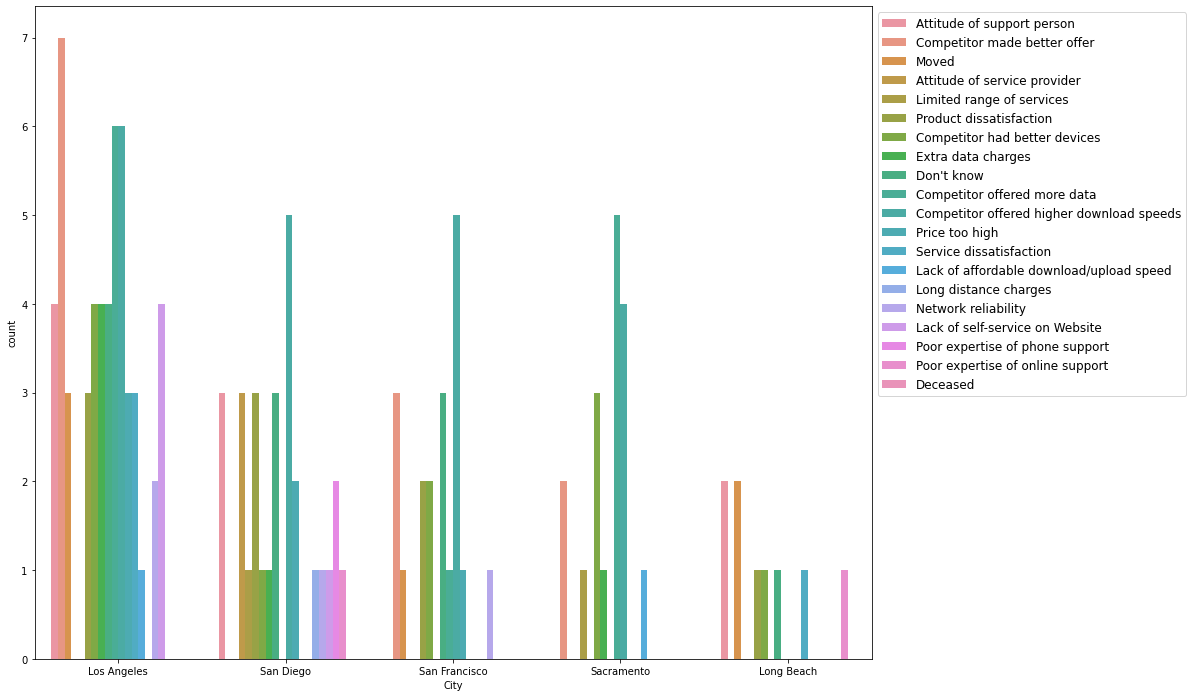

In [6]:
plt.figure(figsize=(15,12))
ax = sns.countplot(x='City',data=telecom_customer,order=telecom_customer.loc[(telecom_customer['Churn Value']=='Yes') & (telecom_customer['Internet Service']=='Fiber optic')]['City'].value_counts()[0:5].index,hue='Churn Reason')
ax.legend(bbox_to_anchor=(1, 1),prop={'size':12})
plt.show()

* In Los Angeles,most customers are churn as other competitor give better offer to them.
* In cities like San Francisco , San Diego and Sacramento , main factor of customers churn is competitor offered higher download speeds.
* In Long Beach , 2 main factors for customer churn is attitude of the support pperson and Moved.

**Which payment method San Francisco churned customers mostly use?**

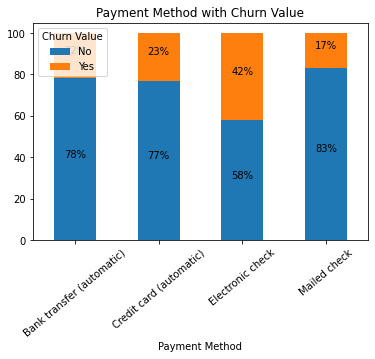

In [7]:
ax= pd.crosstab(telecom_customer[(telecom_customer['City']=='San Francisco')]['Payment Method'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(stacked=True, rot=0,title ='Payment Method with Churn Value')
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* San Francisco churned customers mostly use Elecronic Check payment method.
* Company should encourage more use of mailed check method which will decrease churn rate.

**Which Contract San Francisco churned customers mostly use?**

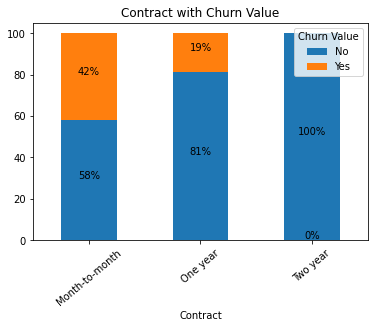

In [8]:
ax= pd.crosstab(telecom_customer[(telecom_customer['City']=='San Francisco')]['Contract'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(stacked=True, rot=0,title = 'Contract with Churn Value')
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customers in San Francisco who take Two year contract will not churn.
* Customers chooses month-to-month contract are 42% churn.

**Customers contract who have no internet service?**

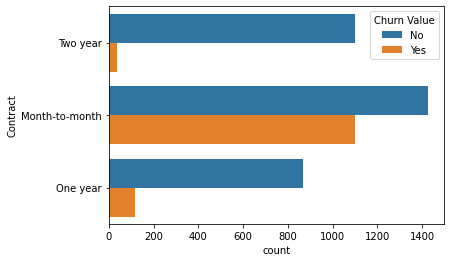

In [9]:
sns.countplot(y='Contract',data=telecom_customer,order=telecom_customer.loc[(telecom_customer['Internet Service']=='No')]['Contract'].value_counts().index,hue='Churn Value')
plt.show()


* Customer without internet service prefer month-to-month and 2 year contract.
* But Month-to-month Contract have highest churn value.

**Customer payment method who pay more than mean monthly charge?**

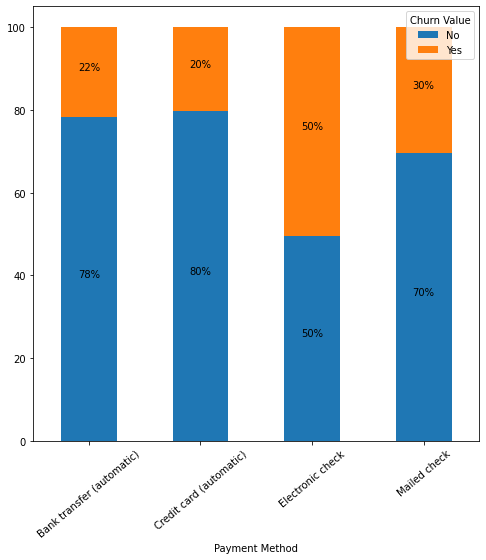

In [10]:
ax= pd.crosstab(telecom_customer[(telecom_customer['Monthly Charges'] > 64.89)]['Payment Method'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(figsize=(8,8),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customer who pay by electronic check pay more than mean monthly charges are 50% churn.

**Numerical Columns Distribution with Churn & No Churn**

In [11]:
customer_churn=telecom_customer.loc[(telecom_customer['Churn Value']=='Yes')]
customer_nochurn=telecom_customer.loc[(telecom_customer['Churn Value']=='No')]

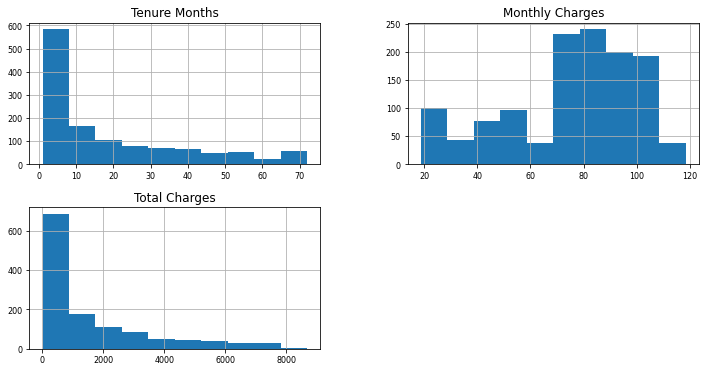

In [12]:
customer_churn[['Tenure Months', 
                  'Monthly Charges', 'Total Charges']].hist(figsize=(12, 6),bins=10, xlabelsize=8,
                                                                                   ylabelsize=8);  

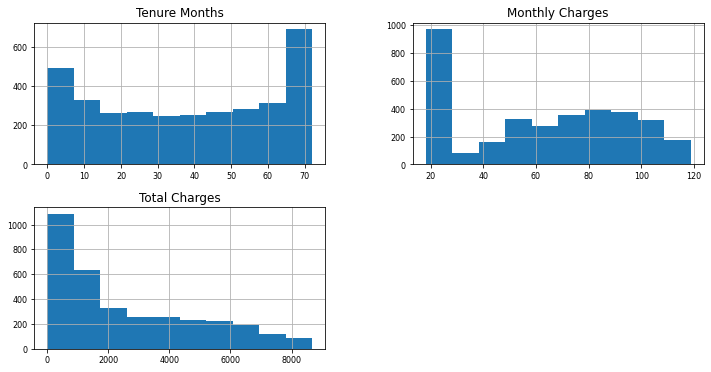

In [13]:
customer_nochurn[['Tenure Months', 
                  'Monthly Charges', 'Total Charges']].hist(figsize=(12, 6),bins=10, xlabelsize=8,
                                                                                   ylabelsize=8);  

**Which types of customers have greater than average  Customer Lifetime Value and less churn?**

In [14]:
mcltv=telecom_customer['Monthly Charges'].mean()

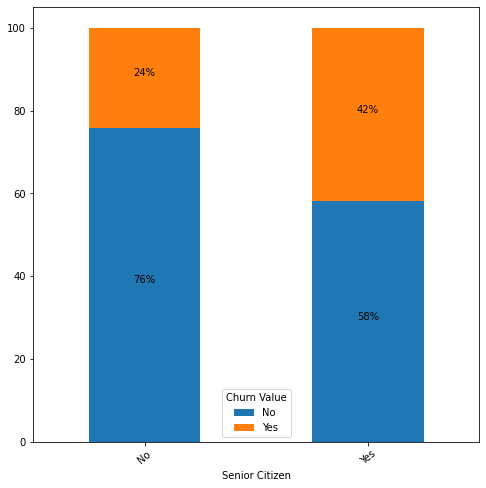

In [15]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv)]['Senior Citizen'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(figsize=(8,8),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Senior Citizen have very low CLTV,so they are low profitable customers to the company.

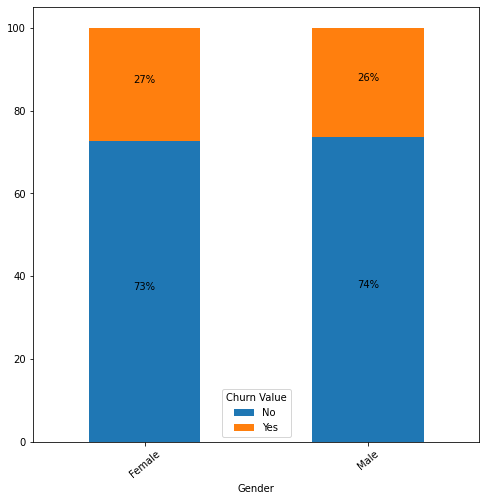

In [16]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Gender'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(figsize=(8,8),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Male and Female customers have almost similar CLTV,so both are profitable to company.

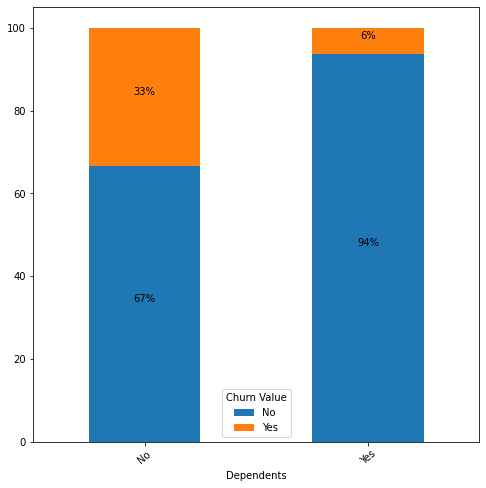

In [17]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Dependents'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(figsize=(8,8),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customer with dependents have higher CLTV and less churn,so they are more profitable to the company.

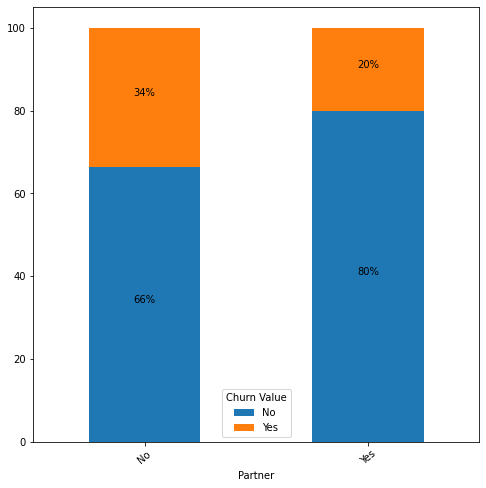

In [18]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Partner'], telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
cw=ax.plot.bar(figsize=(8,8),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customer with partner have higher CLTV and less churn ,so they are more profitable to the company.

**Correlation Analysis**


In [19]:
telecom_customer['Churn Value']=telecom_customer['Churn Value'].map({'No':0,'Yes':1})
mat=telecom_customer.drop(["Zip Code","Latitude","Longitude"],axis=1)
corr_mat = mat.corr()
corr_mat

,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value
Tenure Months,1.000000,0.249477,0.826230,0.399144,-0.351411
Monthly Charges,0.249477,1.000000,0.652260,0.108782,0.194242
Total Charges,0.826230,0.652260,1.000000,0.350800,-0.197336
CLTV,0.399144,0.108782,0.350800,1.000000,-0.128944
Churn Value,-0.351411,0.194242,-0.197336,-0.128944,1.000000


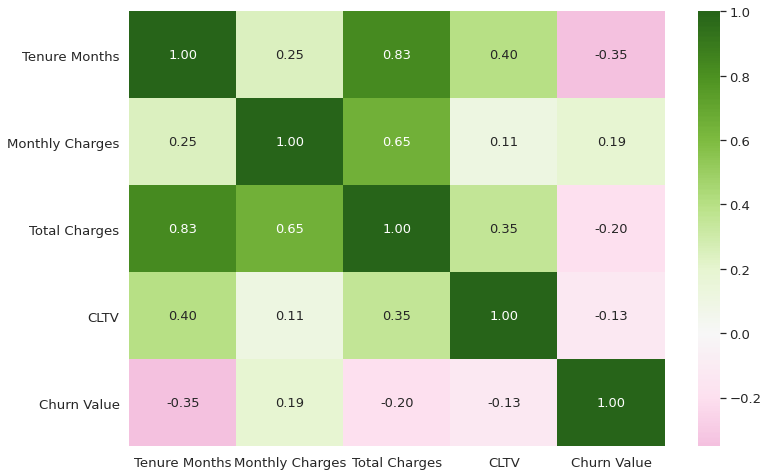

In [20]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

* Monthly Charges are positively correlated with churn value.
* CLTV is more correlated with Tenure Months and Total Charges
* Total Charges is highly correlated with Tenure Months
and Monthly Charges.